# 模型检验
接收已经处理好的因子与被解释变量
## 1，默认模型
## 2，优化参数
## 3，检查差异

In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV, KFold
from sklearn.metrics import r2_score

from xgboost.sklearn import XGBRegressor
from sklearn.neural_network import MLPRegressor

# 加载数据
首列为被解释变量，其余列为因子

In [2]:
#data = pd.read_excel('ready_data.xlsx', index_col=[0])
data = pd.read_csv('ready_data.csv', index_col=[0])
data

,N_DAYS_RET,close,atr14,RSI14,close_1,close_2,close_3,close_4,close_5,close_6,...,RSI14_20,RSI14_21,RSI14_22,RSI14_23,RSI14_24,RSI14_25,RSI14_26,RSI14_27,RSI14_28,RSI14_29
date,,,,,,,,,,,,,,,,,,,,,
2014-08-15,-0.002696,2975.830400,48.316300,60.822875,2994.873400,2989.882500,2916.963600,2924.930800,2934.945600,2883.000000,...,45.877151,54.334271,48.162167,52.267961,53.108780,56.260267,60.243700,65.248519,77.488426,81.102362
2014-08-18,-0.004701,2977.807900,46.644557,61.110921,2975.830400,2994.873400,2989.882500,2916.963600,2924.930800,2934.945600,...,45.386376,45.877151,54.334271,48.162167,52.267961,53.108780,56.260267,60.243700,65.248519,77.488426
2014-08-19,-0.014741,2986.904300,45.241374,62.477572,2977.807900,2975.830400,2994.873400,2989.882500,2916.963600,2924.930800,...,48.761414,45.386376,45.877151,54.334271,48.162167,52.267961,53.108780,56.260267,60.243700,65.248519
2014-08-20,-0.025873,2967.808000,43.733626,57.879075,2986.904300,2977.807900,2975.830400,2994.873400,2989.882500,2916.963600,...,47.462610,48.761414,45.386376,45.877151,54.334271,48.162167,52.267961,53.108780,56.260267,60.243700
2014-08-21,-0.041784,2963.808600,42.307674,56.933941,2967.808000,2986.904300,2977.807900,2975.830400,2994.873400,2989.882500,...,48.101023,47.462610,48.761414,45.386376,45.877151,54.334271,48.162167,52.267961,53.108780,56.260267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,0.019982,2759.840703,79.807977,60.304931,2787.107755,2789.450882,2802.215311,2765.968973,2709.278578,2706.357735,...,47.061149,43.722773,42.711119,43.737497,46.963290,51.522898,49.785698,43.741310,47.137580,46.871713
2022-01-25,0.016533,2769.749707,78.232356,61.145222,2759.840703,2787.107755,2789.450882,2802.215311,2765.968973,2709.278578,...,41.060690,47.061149,43.722773,42.711119,43.737497,46.963290,51.522898,49.785698,43.741310,47.137580
2022-01-26,0.047029,2811.952386,79.079586,64.583876,2769.749707,2759.840703,2787.107755,2789.450882,2802.215311,2765.968973,...,40.328617,41.060690,47.061149,43.722773,42.711119,43.737497,46.963290,51.522898,49.785698,43.741310


In [3]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [6]:
X

,close,atr14,RSI14,close_1,close_2,close_3,close_4,close_5,close_6,close_7,...,RSI14_20,RSI14_21,RSI14_22,RSI14_23,RSI14_24,RSI14_25,RSI14_26,RSI14_27,RSI14_28,RSI14_29
date,,,,,,,,,,,,,,,,,,,,,
2014-08-15,2975.830400,48.316300,60.822875,2994.873400,2989.882500,2916.963600,2924.930800,2934.945600,2883.000000,2888.988100,...,45.877151,54.334271,48.162167,52.267961,53.108780,56.260267,60.243700,65.248519,77.488426,81.102362
2014-08-18,2977.807900,46.644557,61.110921,2975.830400,2994.873400,2989.882500,2916.963600,2924.930800,2934.945600,2883.000000,...,45.386376,45.877151,54.334271,48.162167,52.267961,53.108780,56.260267,60.243700,65.248519,77.488426
2014-08-19,2986.904300,45.241374,62.477572,2977.807900,2975.830400,2994.873400,2989.882500,2916.963600,2924.930800,2934.945600,...,48.761414,45.386376,45.877151,54.334271,48.162167,52.267961,53.108780,56.260267,60.243700,65.248519
2014-08-20,2967.808000,43.733626,57.879075,2986.904300,2977.807900,2975.830400,2994.873400,2989.882500,2916.963600,2924.930800,...,47.462610,48.761414,45.386376,45.877151,54.334271,48.162167,52.267961,53.108780,56.260267,60.243700
2014-08-21,2963.808600,42.307674,56.933941,2967.808000,2986.904300,2977.807900,2975.830400,2994.873400,2989.882500,2916.963600,...,48.101023,47.462610,48.761414,45.386376,45.877151,54.334271,48.162167,52.267961,53.108780,56.260267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,2759.840703,79.807977,60.304931,2787.107755,2789.450882,2802.215311,2765.968973,2709.278578,2706.357735,2604.720395,...,47.061149,43.722773,42.711119,43.737497,46.963290,51.522898,49.785698,43.741310,47.137580,46.871713
2022-01-25,2769.749707,78.232356,61.145222,2759.840703,2787.107755,2789.450882,2802.215311,2765.968973,2709.278578,2706.357735,...,41.060690,47.061149,43.722773,42.711119,43.737497,46.963290,51.522898,49.785698,43.741310,47.137580
2022-01-26,2811.952386,79.079586,64.583876,2769.749707,2759.840703,2787.107755,2789.450882,2802.215311,2765.968973,2709.278578,...,40.328617,41.060690,47.061149,43.722773,42.711119,43.737497,46.963290,51.522898,49.785698,43.741310


(array([  2.,   1.,   0.,   2.,   0.,   0.,   1.,   1.,   0.,   2.,   5.,
          5.,   5.,  14.,  15.,  24.,  26.,  49.,  48.,  79.,  98., 125.,
        137., 136., 157., 152., 160., 119., 121.,  90.,  52.,  58.,  40.,
         30.,  18.,  14.,  12.,   6.,   3.,   3.,   4.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.14106476, -0.13535962, -0.12965448, -0.12394933, -0.11824419,
        -0.11253905, -0.1068339 , -0.10112876, -0.09542362, -0.08971847,
        -0.08401333, -0.07830819, -0.07260304, -0.0668979 , -0.06119275,
        -0.05548761, -0.04978247, -0.04407732, -0.03837218, -0.03266704,
        -0.02696189, -0.02125675, -0.01555161, -0.00984646, -0.00414132,
         0.00156382,  0.00726897,  0.01297411,  0.01867925,  0.0243844 ,
         0.03008954,  0.03579469,  0.04149983,  0.04720497,  0.05291012,
         0.05861526,  0.0643204 ,  0.07002555,  0.07573069,  0.08143583,
         0.08714098,  0.09284612,  0.09855126,  0.10425641,  0.10996155,
 

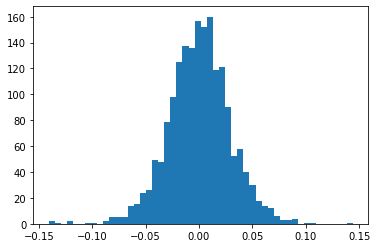

In [4]:
plt.hist(y, bins=50)

In [ ]:
# 平稳性检验
# 白噪声检验

# 1. 整体验证

## 对变量做标准归一化

In [5]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

## xgboost

In [8]:
# 默认参数
xgb_rgr = XGBRegressor()
cv0 = KFold(n_splits=5, shuffle=True)
scoring = ['r2', 'neg_mean_squared_error']
cv_results = cross_validate(xgb_rgr, X_transformed, y, cv=cv0, scoring=scoring, return_train_score=True)
cv_results

(0.26981186113799244, 0.02935082764458477)

In [ ]:
cv_results['test_r2'].mean(), cv_results['test_r2'].std()

In [9]:
# 多做几次grid search，取排名均值，得到最佳超参组合，这样使得结果更稳健。
# grid search with cross-validation
param_grid = {
    'eta': [0.2, 0.25, 0.3, 0.35, 0.4], # learning rate
    'gamma': [0, 0.025, 0.05, 0.075, 0.01]  # min_split_loss
}

cv1 = KFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(XGBRegressor(), param_grid, scoring='r2', cv=cv1)
grid_search.fit(X_transformed, y)

best_estimator = grid_search.best_estimator_
print('best score:', grid_search.best_score_)
print('best params:',grid_search.best_params_)
pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Nested cross-validation 用于更严谨地评价最优超参模型的表现，但此处不需到这一步工作
# 因为只需对比各种超参组合间的表现差异，而非对比某一超参组合表现与其泛化表现的差异

best score: 0.3121162080503941
best_params: {'eta': 0.25, 'gamma': 0}


,params,mean_test_score,std_test_score,rank_test_score
0,"{'eta': 0.2, 'gamma': 0}",0.305548,0.028687,2
1,"{'eta': 0.2, 'gamma': 0.025}",0.046008,0.004050,12
2,"{'eta': 0.2, 'gamma': 0.05}",0.012444,0.002345,20
3,"{'eta': 0.2, 'gamma': 0.075}",-0.001593,0.001479,25
4,"{'eta': 0.2, 'gamma': 0.01}",0.123482,0.017700,8
5,"{'eta': 0.25, 'gamma': 0}",0.312116,0.019622,1
6,"{'eta': 0.25, 'gamma': 0.025}",0.040735,0.010948,15
7,"{'eta': 0.25, 'gamma': 0.05}",0.015331,0.003152,19
8,"{'eta': 0.25, 'gamma': 0.075}",-0.001593,0.001479,24
9,"{'eta': 0.25, 'gamma': 0.01}",0.124085,0.019392,7


In [ ]:
# 优化：用前几个参数的均值新建regressor，而不是用传下来的best regressor

In [10]:
# implement the best etimator to the whole data, exam its performance to what it had done in the grid search
cv2 = KFold(n_splits=5, shuffle=True)
cv_results = cross_validate(best_estimator, X_transformed, y, cv=cv2, scoring=scoring, return_train_score=True)
# comparable information to the above grid search
print('mean_test_r2:', cv_results['test_r2'].mean())
print('std_test_r2:', cv_results['test_r2'].std())
# detailed information
cv_results

mean_test_r2: 0.2750206294065186
std_test_r2: 0.03624591327086326


{'fit_time': array([0.56273222, 0.57778883, 0.65302658, 0.59360862, 0.59360886]),
 'score_time': array([0.01562119, 0.        , 0.        , 0.        , 0.        ]),
 'test_r2': array([0.32066247, 0.25869744, 0.29821586, 0.21483484, 0.28269254]),
 'train_r2': array([0.9949067 , 0.99716767, 0.9967912 , 0.99729393, 0.99626365]),
 'test_neg_mean_squared_error': array([-0.00066611, -0.00054284, -0.00065685, -0.00061619, -0.00058998]),
 'train_neg_mean_squared_error': array([-4.17213267e-06, -2.50108716e-06, -2.66994451e-06, -2.35404260e-06,
        -3.21273262e-06])}

## 结果检验

In [1]:
# use the best estimator to predict data. To do that, we use cross-validation.
# the reason is not for getting robust results, but for getting predicted values of whole data.
y_pred = cross_val_predict(best_estimator, X_transformed, y, cv=cv2)

y_pred_indexed = pd.Series(y_pred, index=y.index) # 给y_pred贴上时间索引
# 预测值与真实值间的相关性
plt.scatter(y_pred_indexed.values, y.values)

NameError: name 'cross_val_predict' is not defined

In [72]:
y_pred_indexed.idxmax()

'2021-09-28'

In [38]:
plt.figure(figsize=(50, 25))
# time index
time_index = pd.DatetimeIndex(y.index)
plt.plot(time_index, y.values, color='green', label='real y')
plt.plot(time_index, y_pred_indexed.values, color='orange', label='predicted y')
# 水平线
plt.axhline(y=0, color='red')
# 标题
plt.title('real y and predicted y', fontsize=50)
# 图例
plt.legend(fontsize = 36)
# 轴字体大小
plt.xticks(fontsize=36)
plt.yticks(fontsize=36)
# 调节区间 
#plt.xlim(pd.DatetimeIndex(['2020-01-1', '2022-01-01']))

SyntaxError: closing parenthesis '}' does not match opening parenthesis '(' (<ipython-input-38-98180f496cc7>, line 9)

(array([-0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

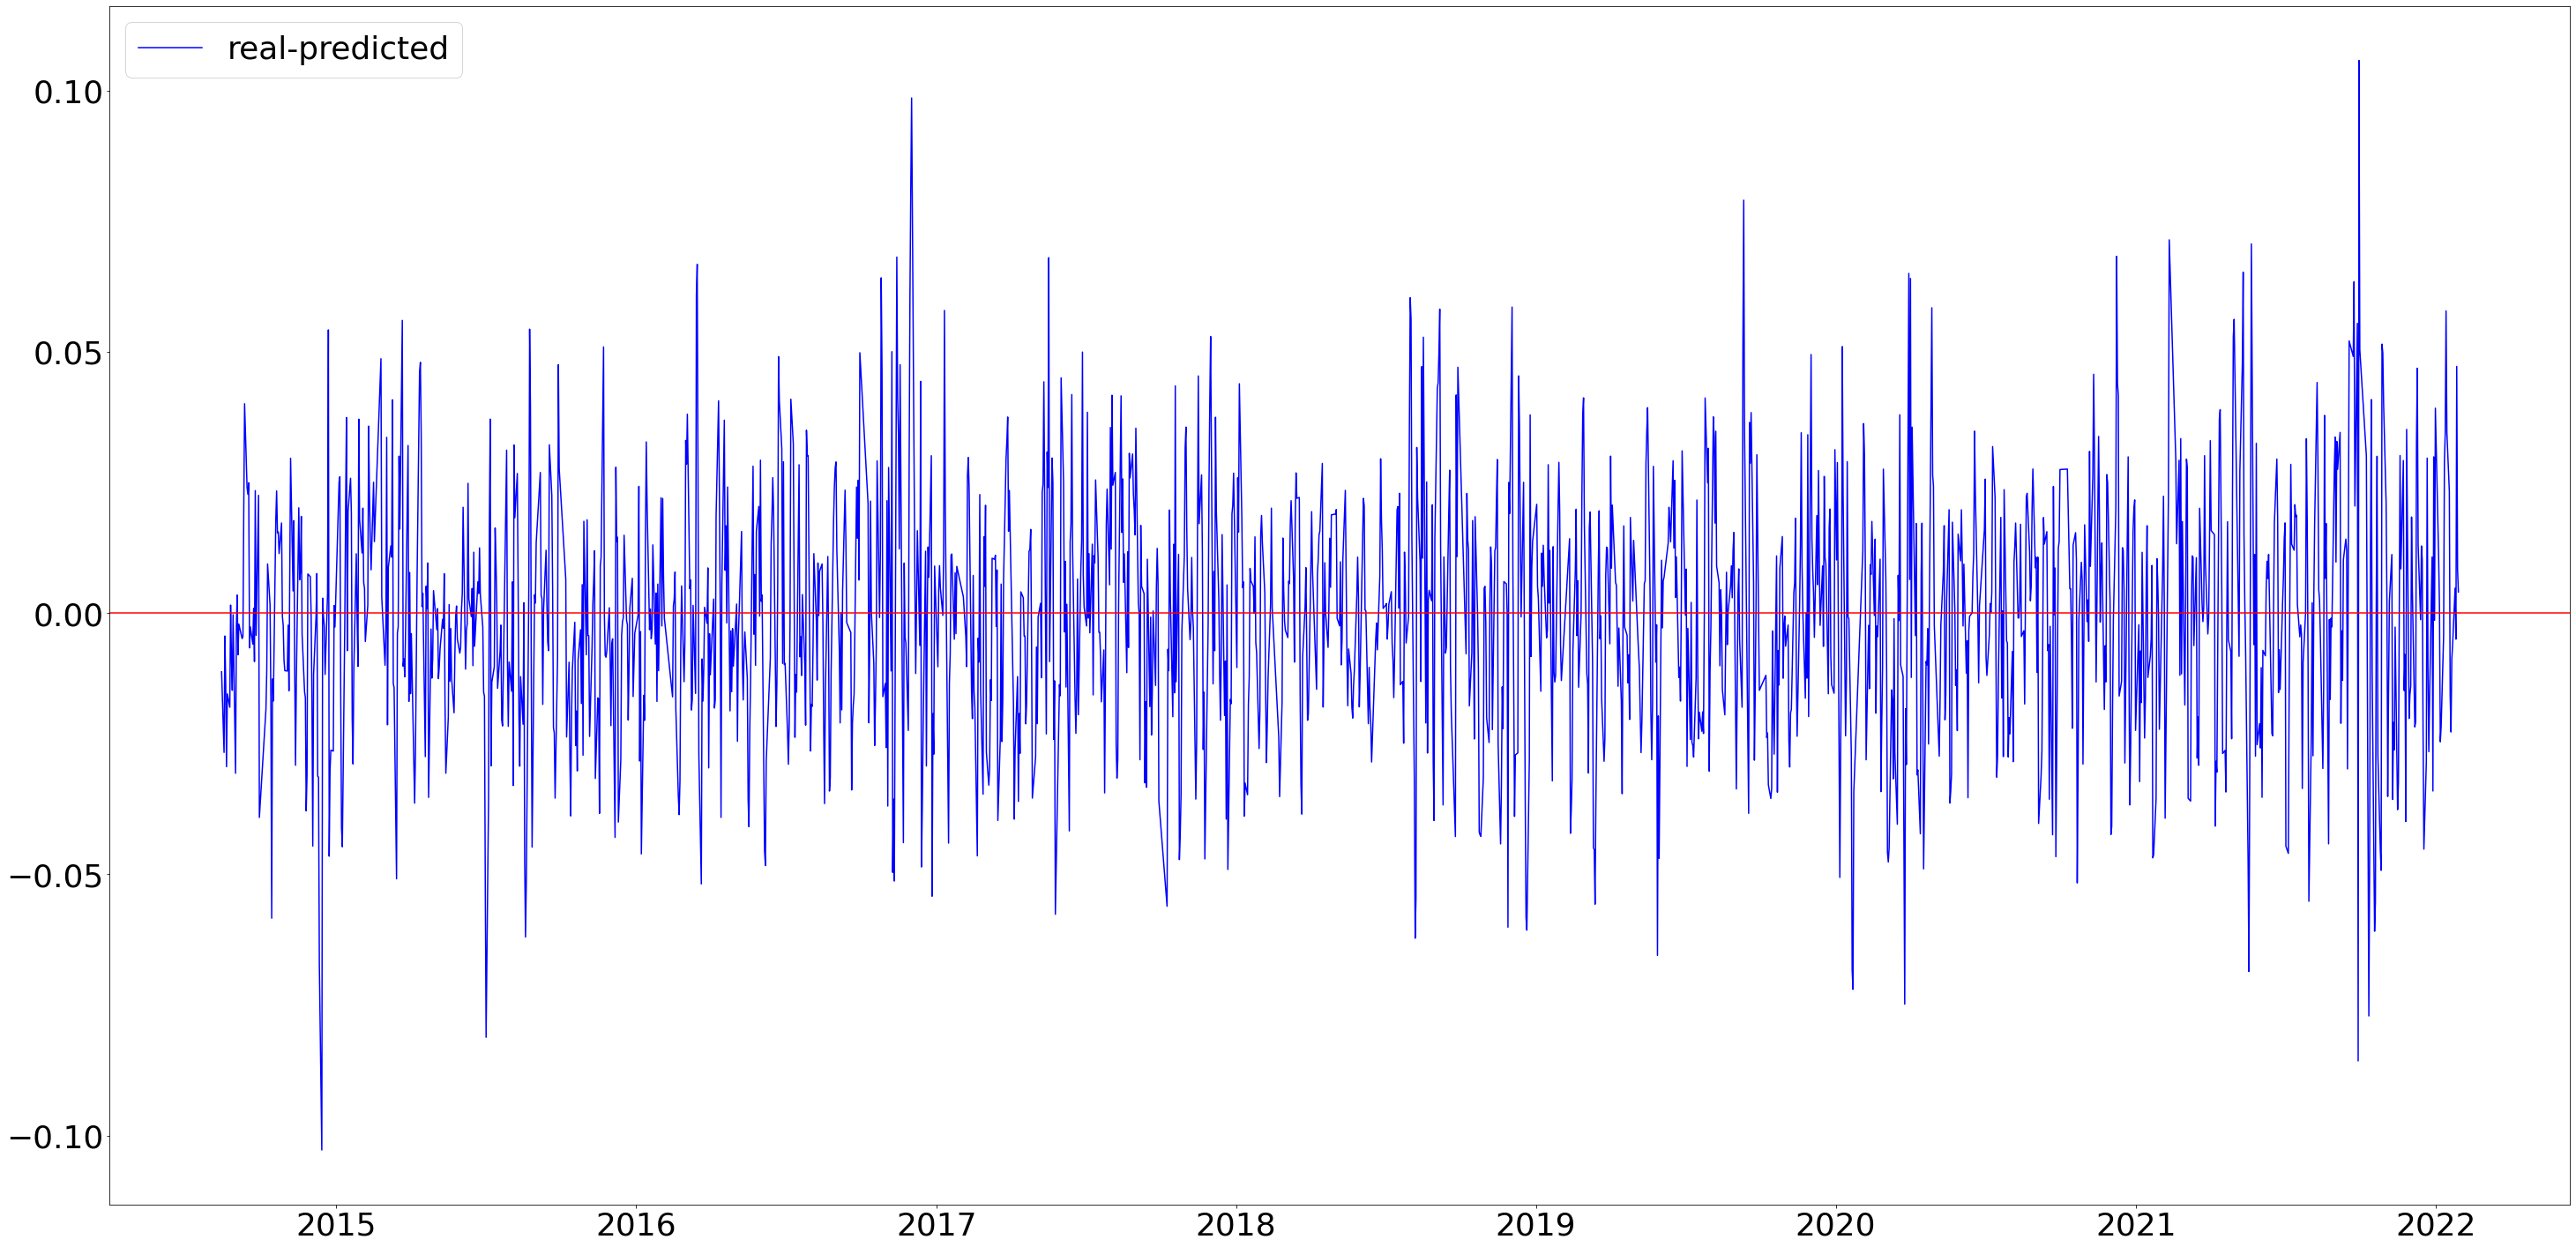

In [16]:
# 真实值与预测值之差
diff = y - y_pred_indexed

plt.figure(figsize=(50, 25))
plt.plot(time_index, diff.values, color='blue', label='real-predicted')
plt.axhline(y=0, color='red')


# 水平线
## 图例
plt.legend(fontsize = 36)
# 轴字体大小
plt.xticks(fontsize=36)
plt.yticks(fontsize=36)
# 调节区间
#plt.xlim(pd.DatetimeIndex(['2020-01-1', '2022-01-01']))

# 标出上下界， 找出偏差的时间index
# 结合收盘价图，两种轴坐标

(18779.0, 18992.0)

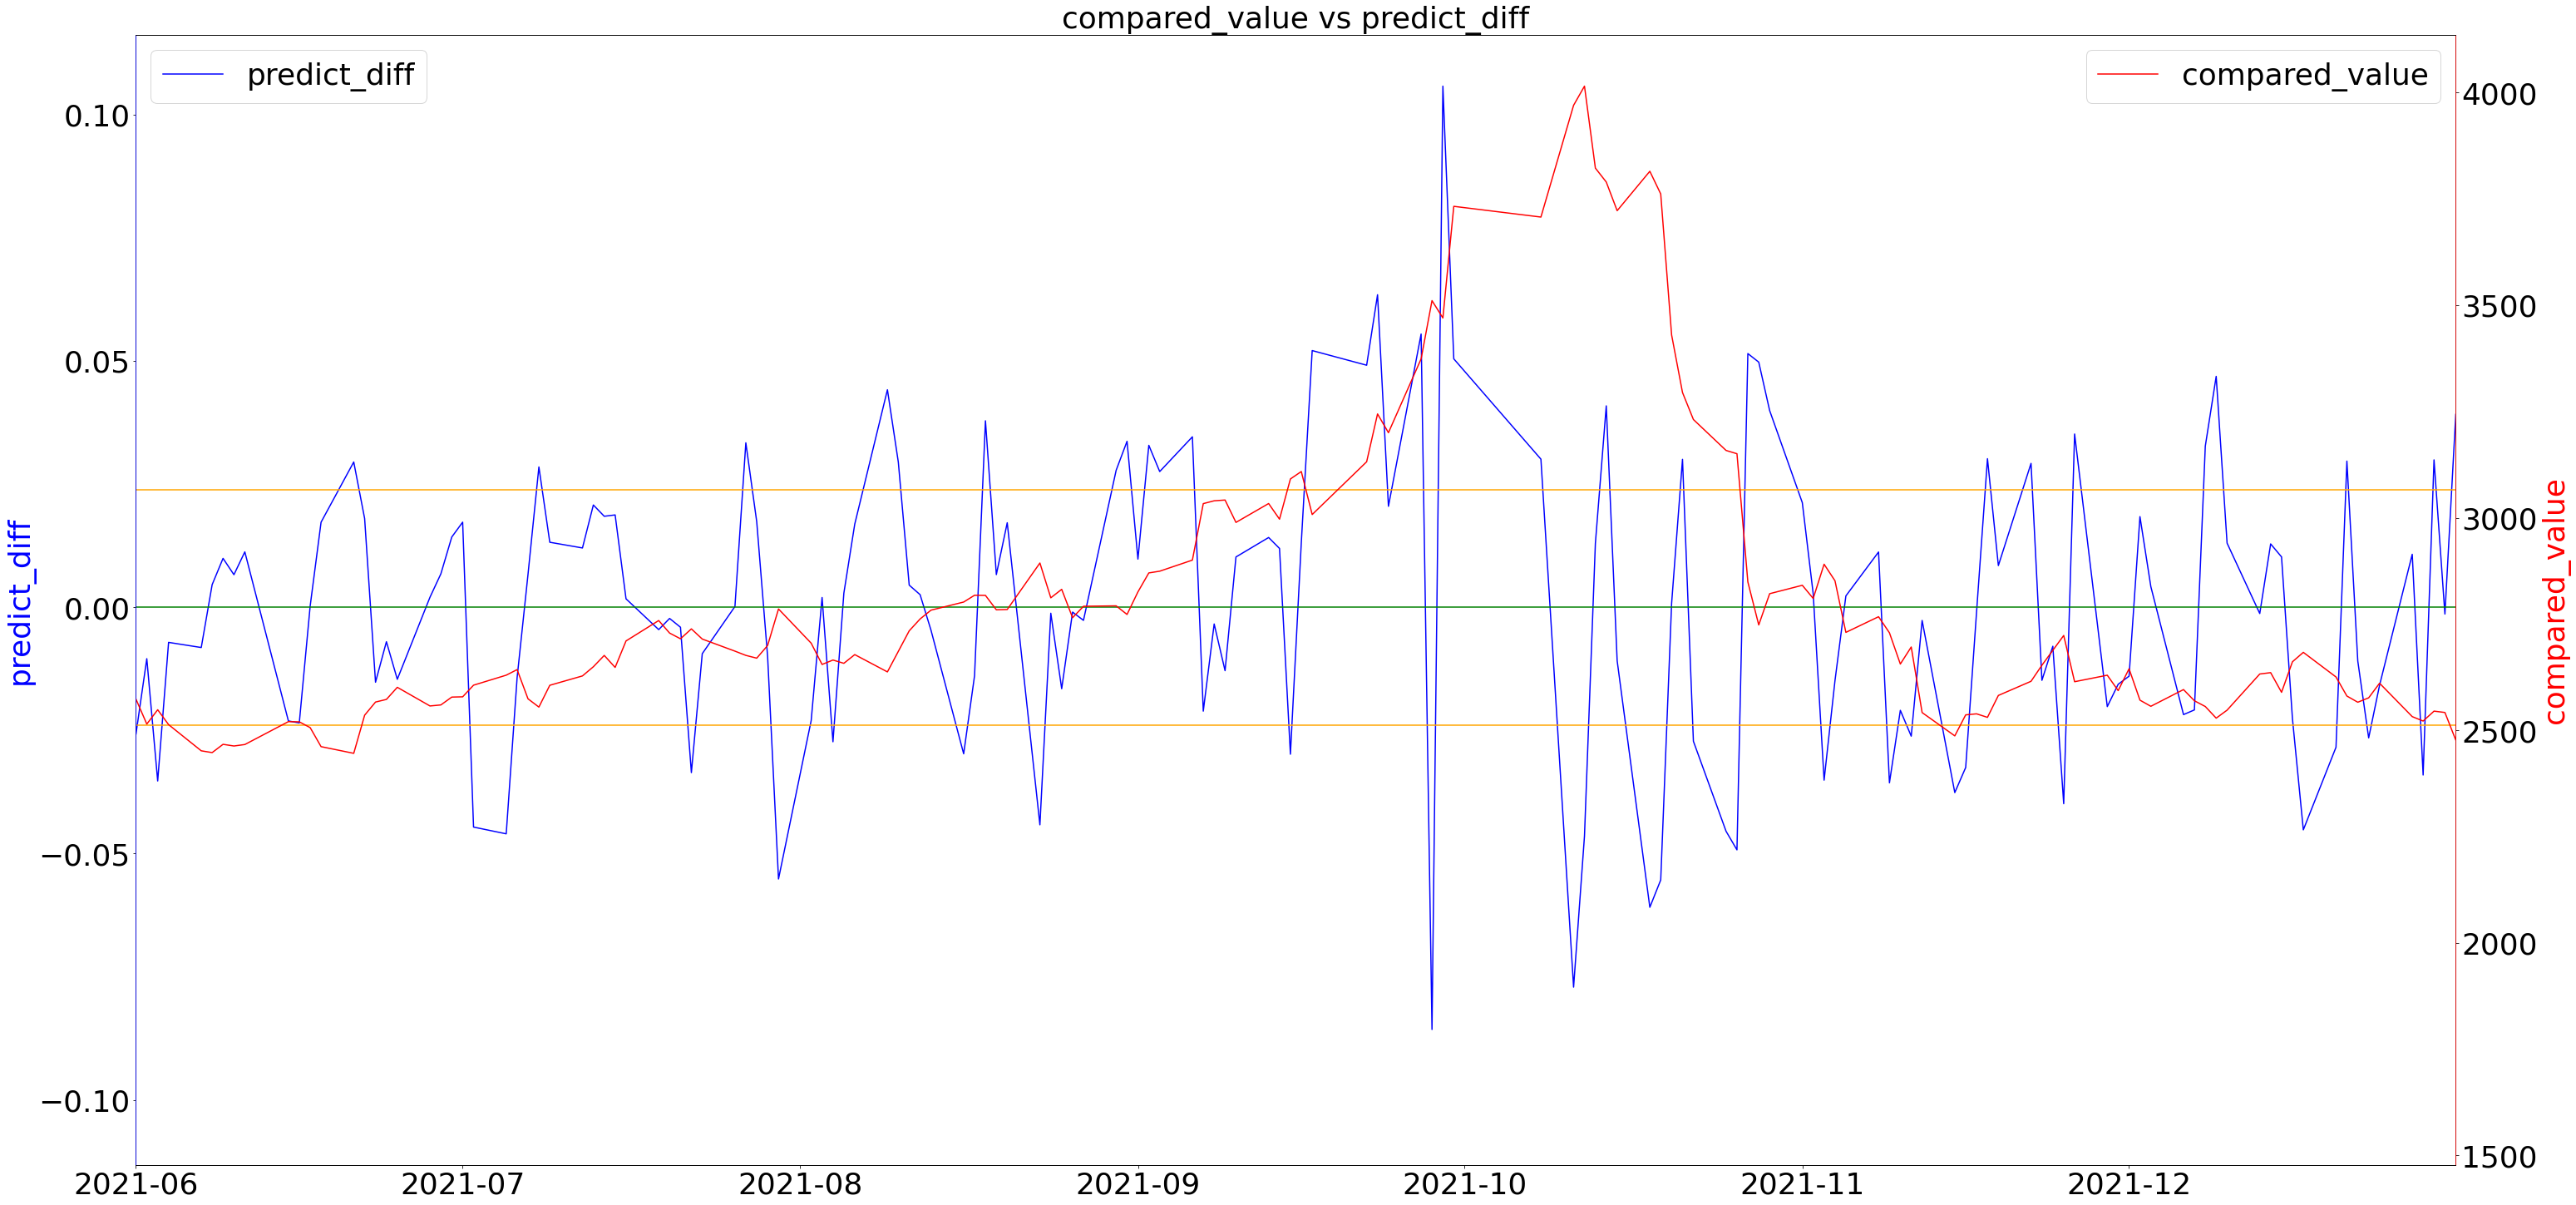

In [73]:
# 真实收盘价与预测差异同图
compared_value = pd.read_csv('close_price.csv').iloc[:,1]

fig, ax1 = plt.subplots(figsize=(50,25))
 
h1 =ax1.plot(time_index, diff,color='blue',label='predict_diff')
ax1.set_ylabel('predict_diff', fontsize=36, color="blue")
ax1.set_title("compared_value vs predict_diff", fontsize=36)  
ax1.tick_params(labelsize=36)
 
ax2 = ax1.twinx()
h2 = ax2.plot(time_index, compared_value, color='red',label='compared_value')
ax2.set_ylabel('compared_value',fontsize=36, color="red")
ax2.tick_params(labelsize=36)

ax2.spines['left'].set_color('b')
ax2.spines['right'].set_color('r')
#ax2.yaxis.label.set_color('b')
 
ax1.legend(fontsize = 36, loc='upper left')
ax2.legend(fontsize = 36, loc='upper right')
#plt.legend([ax1, ax2], ['predict_diff','compared_value'],fontsize = 36)

ax1.axhline(y=0, color='g')
ax1.axhline(y=diff.std(), color='orange')
ax1.axhline(y=-diff.std(), color='orange')


plt.xlim(pd.DatetimeIndex(['2021-06-1', '2021-12-31']))

# RNN

In [ ]:
# tensorflow

# deep and reinforcement learning

In [ ]:
# openAI.Gim
# 设置环境

# 2. 前后拆分验证

## 按时间顺序拆分成train_test集和validate集

In [83]:
X_tt, X_validate, y_tt, y_validate = train_test_split(X, y, test_size=0.33, shuffle=False)

## 对X_train&test变量做标准归一化，并应用于X_validate
符合认知过程

In [75]:
scaler = StandardScaler()
X_tt_transformed = scaler.fit_transform(X_tt)
X_validate_transformed = scaler.transform(X_validate)

## xgboost

In [79]:
# 默认参数
xgb_rgr = XGBRegressor()
cv0 = KFold(n_splits=5, shuffle=True)
scoring = ['r2', 'neg_mean_squared_error']
cv_results = cross_validate(xgb_rgr, X_tt_transformed, y_tt, cv=cv0, scoring=scoring, return_train_score=True)
cv_results

{'fit_time': array([0.39543915, 0.42147899, 0.43345523, 0.42751646, 0.47179174]),
 'score_time': array([0.        , 0.01562095, 0.        , 0.        , 0.00698161]),
 'test_r2': array([0.21108223, 0.2567824 , 0.3752179 , 0.3643208 , 0.25178994]),
 'train_r2': array([0.99943109, 0.99947708, 0.99943328, 0.99951153, 0.99950801]),
 'test_neg_mean_squared_error': array([-0.00060247, -0.00047659, -0.00045202, -0.00052288, -0.00057708]),
 'train_neg_mean_squared_error': array([-4.23069437e-07, -4.04896294e-07, -4.26148444e-07, -3.56079850e-07,
        -3.63334066e-07])}

In [80]:
cv_results['test_r2'].mean(), cv_results['test_r2'].std()

(0.2918386548759875, 0.06566612670676357)

In [81]:
# 多做几次grid search，取排名均值，得到最佳超参组合，这样使得结果更稳健。
# grid search with cross-validation
param_grid = {
    'eta': [0.2, 0.25, 0.3, 0.35, 0.4], # learning rate
    'gamma': [0, 0.025, 0.05, 0.075, 0.01]  # min_split_loss
}

cv1 = KFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(XGBRegressor(), param_grid, scoring='r2', cv=cv1)
grid_search.fit(X_tt_transformed, y_tt)

best_estimator = grid_search.best_estimator_
print('best score:', grid_search.best_score_)
print('best params:',grid_search.best_params_)
pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
# Nested cross-validation 用于更严谨地评价最优超参模型的表现，但此处不需到这一步工作
# 因为只需对比各种超参组合间的表现差异，而非某一超参组合自身对比其表现与泛化表现

best score: 0.33741466674380477
best params: {'eta': 0.25, 'gamma': 0}


,params,mean_test_score,std_test_score,rank_test_score
0,"{'eta': 0.2, 'gamma': 0}",0.334540,0.016244,2
1,"{'eta': 0.2, 'gamma': 0.025}",0.005491,0.006829,15
2,"{'eta': 0.2, 'gamma': 0.05}",-0.007149,0.009740,16
3,"{'eta': 0.2, 'gamma': 0.075}",-0.007149,0.009740,16
4,"{'eta': 0.2, 'gamma': 0.01}",0.081636,0.027810,6
5,"{'eta': 0.25, 'gamma': 0}",0.337415,0.035318,1
6,"{'eta': 0.25, 'gamma': 0.025}",0.007688,0.006043,14
7,"{'eta': 0.25, 'gamma': 0.05}",-0.007149,0.009740,18
8,"{'eta': 0.25, 'gamma': 0.075}",-0.007149,0.009740,18
9,"{'eta': 0.25, 'gamma': 0.01}",0.063794,0.028136,8


In [90]:
y_validate_pred = best_estimator.predict(X_validate_transformed)
r2_score(y_validate, y_validate_pred)

-0.3645069523582203

In [91]:
# 默认参数
xgb_rgr = XGBRegressor()
xgb_rgr.fit(X_tt_transformed, y_tt)
y_validate_pred = xgb_rgr.predict(X_validate_transformed)
r2_score(y_validate, y_validate_pred)

-0.33013578571832003

# 胜率

In [135]:
# 返回收益率，胜率
win = 0
fail = 0
rate = 1

buy_signal = 0.03

for i in range(len(y_validate)):
    rate = rate * (1+y_validate[i])
    if y_validate_pred[i] > buy_signal: 
        if y_validate[i] > 0:
            win +=1
        else:
            fail +=1

print(win/(win + fail))
print(rate)

0.5882352941176471
2.309779166018973


In [140]:
(1 + y_validate).mean()

1.0019313291502914

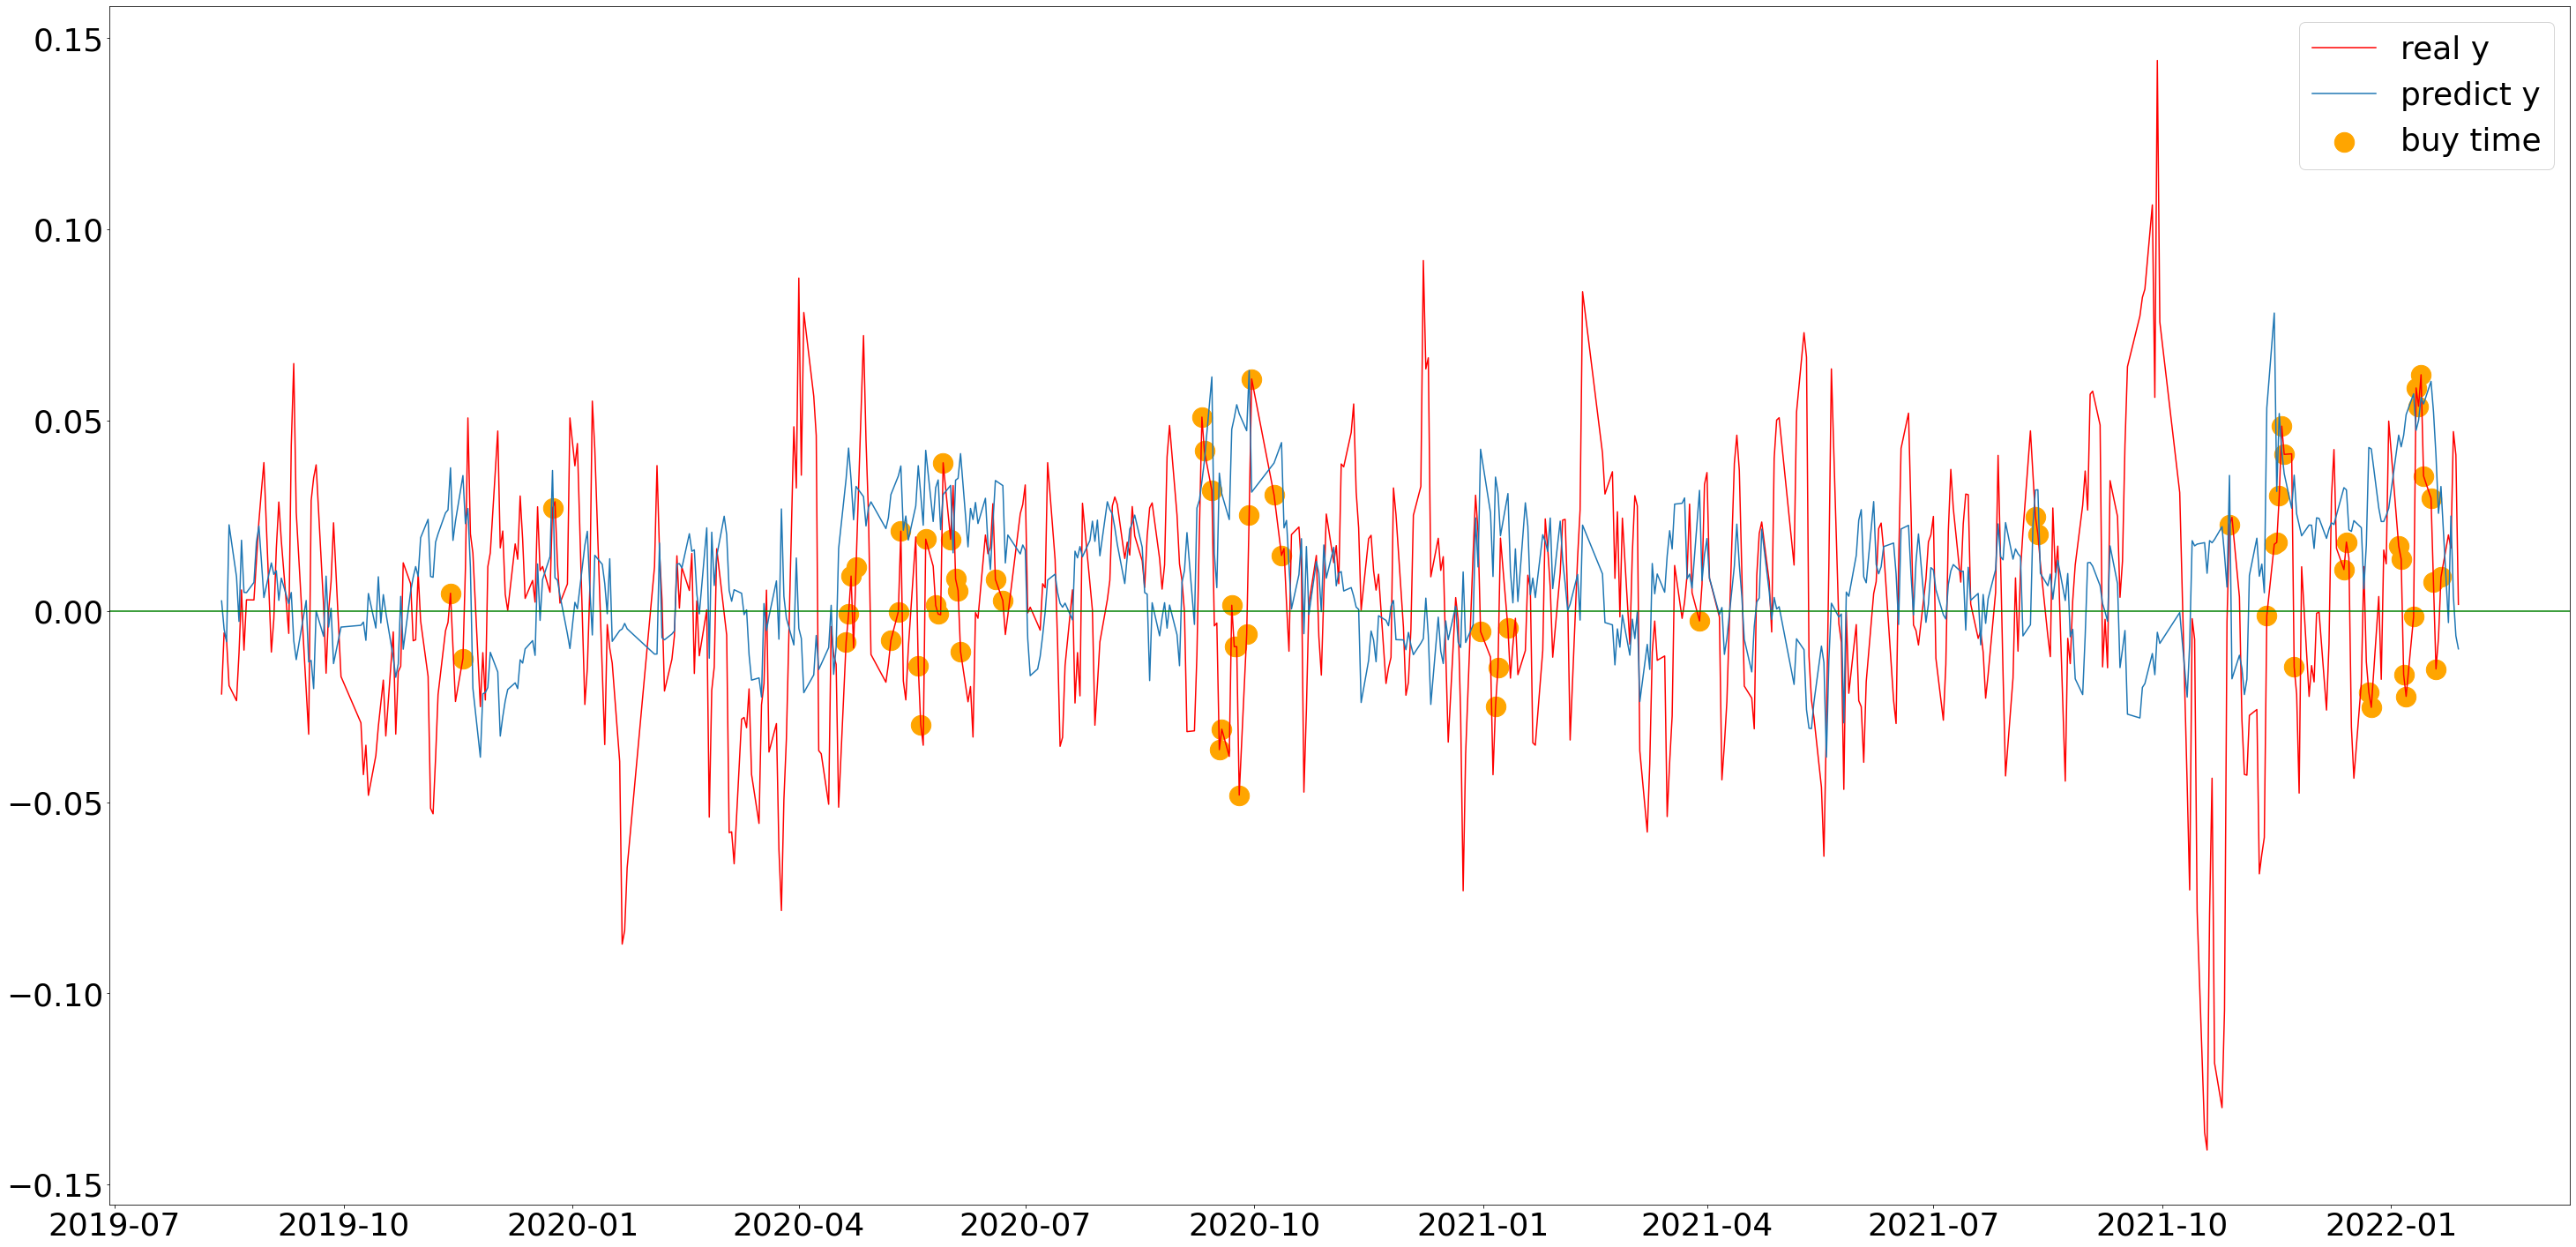

In [136]:
plt.figure(figsize=(50, 25))
time_axis = pd.DatetimeIndex(y_validate.index)
plt.plot(time_axis, y_validate, label='real y', color='red')
plt.plot(time_axis, y_validate_pred, label='predict y')

buy_point = time_axis[y_validate_pred > buy_signal]
buy_return = y_validate[y_validate_pred > buy_signal]

plt.scatter(buy_point, buy_return, label='buy time', s=500, color='orange')

plt.legend(fontsize = 36)
# 轴字体大小
plt.xticks(fontsize=36)
plt.yticks(fontsize=36)

plt.axhline(y=0, color='green')

In [110]:
# 返回详细
            买入价格， 买入收益率， 累计收益率， 累计胜率， 累计赔率
买入日期1
买入日期1
...



DatetimeIndex(['2019-11-13', '2019-11-18', '2019-12-24', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-24', '2020-05-08',
               '2020-05-11', '2020-05-12', '2020-05-19', '2020-05-20',
               '2020-05-22', '2020-05-26', '2020-05-27', '2020-05-29',
               '2020-06-01', '2020-06-03', '2020-06-04', '2020-06-05',
               '2020-06-19', '2020-06-22', '2020-09-10', '2020-09-11',
               '2020-09-14', '2020-09-17', '2020-09-18', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-28',
               '2020-09-29', '2020-09-30', '2020-10-09', '2020-10-12',
               '2020-12-31', '2021-01-06', '2021-01-07', '2021-01-11',
               '2021-03-29', '2021-08-11', '2021-08-12', '2021-10-28',
               '2021-11-12', '2021-11-15', '2021-11-16', '2021-11-17',
               '2021-11-18', '2021-11-19', '2021-11-23', '2021-12-13',
               '2021-12-14', '2021-12-23', '2021-12-24', '2022-01-04',
      

In [113]:
y_validate[]

date
2019-08-13   -0.021664
2019-08-14   -0.005658
2019-08-15   -0.007469
2019-08-16   -0.019470
2019-08-19   -0.023429
                ...   
2022-01-24    0.019982
2022-01-25    0.016533
2022-01-26    0.047029
2022-01-27    0.040911
2022-01-28    0.001786
Name: N_DAYS_RET, Length: 600, dtype: float64

# 可视化部分可写成函数

In [ ]:






## 结果检验

# use the best estimator to predict data. To do that, we use cross-validation.
# the reason is not for getting robust results, but for getting predicted values of whole data.
y_pred = cross_val_predict(best_estimator, X_transformed, y, cv=cv2)

y_pred_indexed = pd.Series(y_pred, index=y.index) # 给y_pred贴上时间索引
# 预测值与真实值间的相关性
plt.scatter(y_pred_indexed.values, y.values)

y_pred_indexed.idxmax()

plt.figure(figsize=(50, 25))
# time index
time_index = pd.DatetimeIndex(y.index)
plt.plot(time_index, y.values, color='green', label='real y')
plt.plot(time_index, y_pred_indexed.values, color='orange', label='predicted y')
# 水平线
plt.axhline(y=0, color='red')
# 标题
plt.title('real y and predicted y', fontsize=50)
# 图例
plt.legend(fontsize = 36)
# 轴字体大小
plt.xticks(fontsize=36)
plt.yticks(fontsize=36)
# 调节区间 
#plt.xlim(pd.DatetimeIndex(['2020-01-1', '2022-01-01']))

# 真实值与预测值之差
diff = y - y_pred_indexed

plt.figure(figsize=(50, 25))
plt.plot(time_index, diff.values, color='blue', label='real-predicted')
plt.axhline(y=0, color='red')


# 水平线
## 图例
plt.legend(fontsize = 36)
# 轴字体大小
plt.xticks(fontsize=36)
plt.yticks(fontsize=36)
# 调节区间
#plt.xlim(pd.DatetimeIndex(['2020-01-1', '2022-01-01']))

# 标出上下界， 找出偏差的时间index
# 结合收盘价图，两种轴坐标

# 真实收盘价与预测差异同图
compared_value = pd.read_csv('close_price.csv').iloc[:,1]

fig, ax1 = plt.subplots(figsize=(50,25))
 
h1 =ax1.plot(time_index, diff,color='blue',label='predict_diff')
ax1.set_ylabel('predict_diff', fontsize=36, color="blue")
ax1.set_title("compared_value vs predict_diff", fontsize=36)  
ax1.tick_params(labelsize=36)
 
ax2 = ax1.twinx()
h2 = ax2.plot(time_index, compared_value, color='red',label='compared_value')
ax2.set_ylabel('compared_value',fontsize=36, color="red")
ax2.tick_params(labelsize=36)

ax2.spines['left'].set_color('b')
ax2.spines['right'].set_color('r')
#ax2.yaxis.label.set_color('b')
 
ax1.legend(fontsize = 36, loc='upper left')
ax2.legend(fontsize = 36, loc='upper right')
#plt.legend([ax1, ax2], ['predict_diff','compared_value'],fontsize = 36)

ax1.axhline(y=0, color='g')
ax1.axhline(y=diff.std(), color='orange')
ax1.axhline(y=-diff.std(), color='orange')


plt.xlim(pd.DatetimeIndex(['2021-06-1', '2021-12-31']))